In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('DATA NRP 7.csv', sep=';')

In [4]:
data.shape 

(300, 15)

In [5]:
data.head(n=20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,55,Private,199067,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
1,29,Private,247445,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
2,49,Private,186078,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,>50K
3,31,Private,77634,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,42,United-States,<=50K
4,24,Private,180060,Masters,14,Never-married,Exec-managerial,Own-child,White,Male,6849,0,90,United-States,<=50K
5,46,Private,56482,Some-college,10,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,40,United-States,<=50K
6,26,Private,314177,HS-grad,9,Never-married,Sales,Not-in-family,Black,Male,0,0,40,United-States,<=50K
7,35,Private,239755,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,0,0,38,United-States,<=50K
8,27,Private,377680,Assoc-voc,11,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,<=50K
9,64,Self-emp-not-inc,134960,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,35,United-States,>50K


In [6]:
data['workclass'].value_counts()

 Private             207
 Local-gov            24
 Self-emp-not-inc     22
 ?                    19
 State-gov            12
 Federal-gov           8
 Self-emp-inc          7
 Without-pay           1
Name: workclass, dtype: int64

In [8]:
data.age.describe()

count    300.000000
mean      39.160000
std       13.761261
min       17.000000
25%       28.000000
50%       38.500000
75%       48.000000
max       90.000000
Name: age, dtype: float64

## MISSING VALUE

In [31]:
data.columns = data.columns.str.replace("'",'')
column = data.columns

In [32]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null float64
workclass         281 non-null object
fnlwgt            300 non-null float64
education         300 non-null object
education-num     300 non-null float64
marital-status    300 non-null object
occupation        281 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null float64
capital-loss      300 non-null float64
hours-per-week    300 non-null float64
native-country    296 non-null object
type              300 non-null object
dtypes: float64(6), object(9)
memory usage: 35.2+ KB


## Mengganti yg kosong supaya terbaca missing value

In [12]:
data = data.replace(' ?', np.nan)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         281 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        281 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    296 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


## Memisahkan Kolom

In [14]:
Y = ['type']
X_int = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week','fnlwgt']
X_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','sex','native-country']

In [15]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

In [16]:
data['type'].value_counts()

 <=50K    232
 >50K      68
Name: type, dtype: int64

## Melihat Jumlah Kelas

In [17]:
#show all distinct value of class
print(data_Y['type'].unique())

[' >50K' ' <=50K']


## Imputasi Missing Value

In [18]:
# find missing data for each data type and fill it with mean and mode
data_cat_array = []
for type_name in data_Y['type'].unique():
    data_cat_1 = data_cat[data_Y['type']==type_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [19]:
data_cat_clean = pd.concat(data_cat_array)

In [20]:
data_clean = pd.concat([data_int, data_cat_clean,data_Y], axis=1)
data_clean.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,fnlwgt,workclass,education,marital-status,occupation,relationship,race,sex,native-country,type
0,55.0,9.0,0.0,0.0,40.0,199067.0,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,>50K
1,29.0,9.0,0.0,0.0,45.0,247445.0,Private,HS-grad,Divorced,Sales,Not-in-family,White,Male,United-States,<=50K
2,49.0,14.0,0.0,0.0,50.0,186078.0,Private,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States,>50K
3,31.0,11.0,0.0,0.0,42.0,77634.0,Private,Assoc-voc,Married-civ-spouse,Other-service,Husband,White,Male,United-States,<=50K
4,24.0,14.0,6849.0,0.0,90.0,180060.0,Private,Masters,Never-married,Exec-managerial,Own-child,White,Male,United-States,<=50K


## Standardize

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
#Standardize untuk data
data['age'] = StandardScaler().fit(data[['age']]).transform(data[['age']])
data['fnlwgt'] = StandardScaler().fit(data[['fnlwgt']]).transform(data[['fnlwgt']])
data['education-num'] = StandardScaler().fit(data[['education-num']]).transform(data[['education-num']])
data['capital-gain'] = StandardScaler().fit(data[['capital-gain']]).transform(data[['capital-gain']])
data['capital-loss'] = StandardScaler().fit(data[['capital-loss']]).transform(data[['capital-loss']])
data['hours-per-week'] = StandardScaler().fit(data[['hours-per-week']]).transform(data[['hours-per-week']])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,1.152981,Private,0.051307,HS-grad,-0.468536,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.122954,-0.201917,-0.117739,United-States,>50K
1,-0.739538,Private,0.518854,HS-grad,-0.468536,Divorced,Sales,Not-in-family,White,Male,-0.122954,-0.201917,0.276476,United-States,<=50K
2,0.716245,Private,-0.074224,Masters,1.456955,Married-civ-spouse,Prof-specialty,Wife,White,Female,-0.122954,-0.201917,0.670690,United-States,>50K
3,-0.593960,Private,-1.122276,Assoc-voc,0.301660,Married-civ-spouse,Other-service,Husband,White,Male,-0.122954,-0.201917,0.039947,United-States,<=50K
4,-1.103484,Private,-0.132385,Masters,1.456955,Never-married,Exec-managerial,Own-child,White,Male,1.004371,-0.201917,3.824406,United-States,<=50K


## Normalize

In [23]:
from sklearn.preprocessing import Normalizer 

In [24]:
#Normalize untuk data
data['age'] = Normalizer().fit(data[['age']]).transform(data[['age']])
data['fnlwgt'] = Normalizer().fit(data[['fnlwgt']]).transform(data[['fnlwgt']])
data['education-num'] = Normalizer().fit(data[['education-num']]).transform(data[['education-num']])
data['capital-gain'] = Normalizer().fit(data[['capital-gain']]).transform(data[['capital-gain']])
data['capital-gain'] = Normalizer().fit(data[['capital-gain']]).transform(data[['capital-gain']])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,1.0,Private,1.0,HS-grad,-1.0,Married-civ-spouse,Craft-repair,Husband,White,Male,-1.0,-0.201917,-0.117739,United-States,>50K
1,-1.0,Private,1.0,HS-grad,-1.0,Divorced,Sales,Not-in-family,White,Male,-1.0,-0.201917,0.276476,United-States,<=50K
2,1.0,Private,-1.0,Masters,1.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,-1.0,-0.201917,0.670690,United-States,>50K
3,-1.0,Private,-1.0,Assoc-voc,1.0,Married-civ-spouse,Other-service,Husband,White,Male,-1.0,-0.201917,0.039947,United-States,<=50K
4,-1.0,Private,-1.0,Masters,1.0,Never-married,Exec-managerial,Own-child,White,Male,1.0,-0.201917,3.824406,United-States,<=50K


## Deteksi Outlier

In [25]:
### for detect outlier
data_num_w_type = pd.concat([data_int, data_cat_clean,data_Y], axis=1)

In [26]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

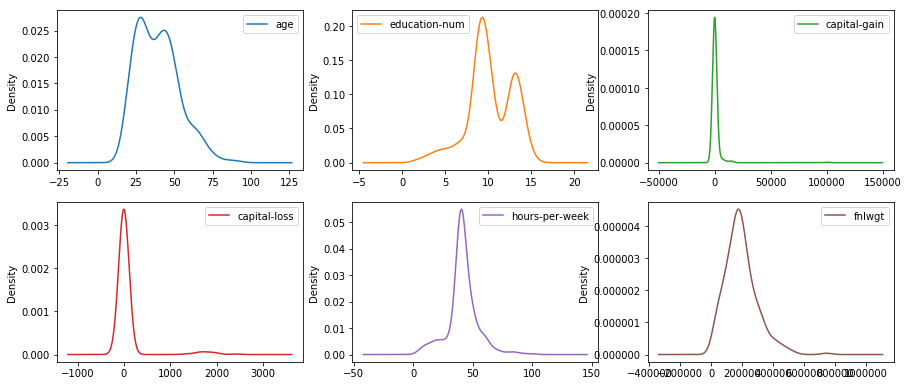

In [27]:
# Univariate Density Plots
data_num_w_type.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

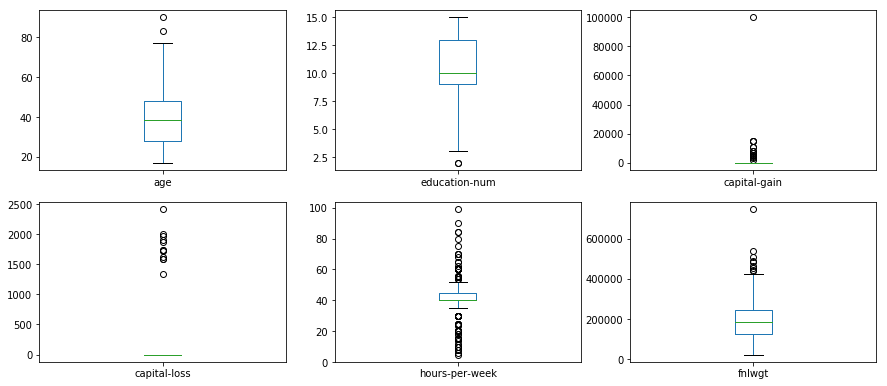

In [28]:
data_num_w_type.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [29]:
colors_palette = {" >50K": "red",  " <=50K": "blue"}
colors = [colors_palette[c] for c in data_num_w_type['type']]   

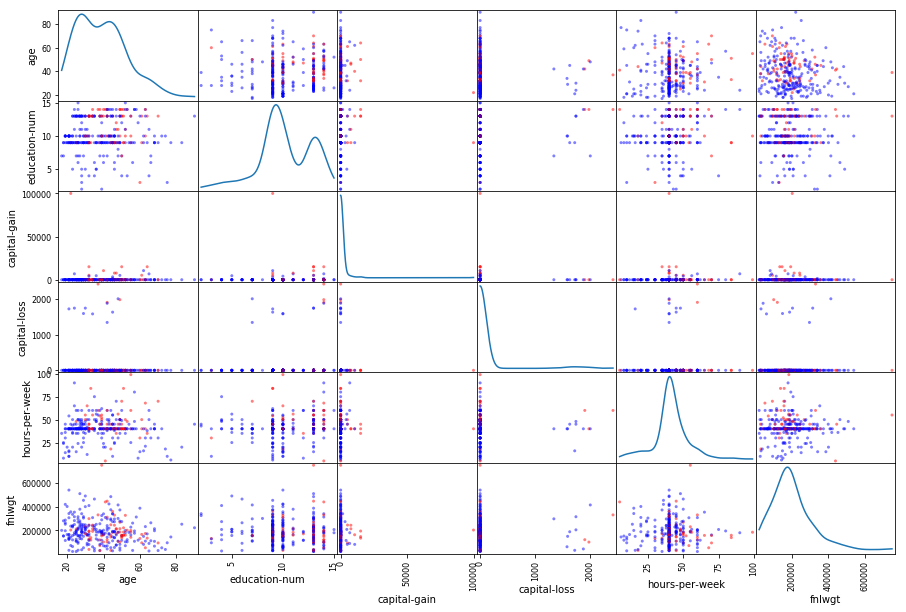

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_num_w_type, color=colors, diagonal='kde')
plt.show()

In [33]:
data_cleaned = pd.concat([data_num_w_type, data_cat_clean], axis=1)

In [34]:
# rearrange columns position to default
data_cleaned = data_cleaned[column]

In [36]:
data_cleaned.to_csv('Data Tugas Data Mining NRP 7.csv', index=0)